NAE trung bình trên test: 12.17%
NAE trung bình trên data thật: 7.04%


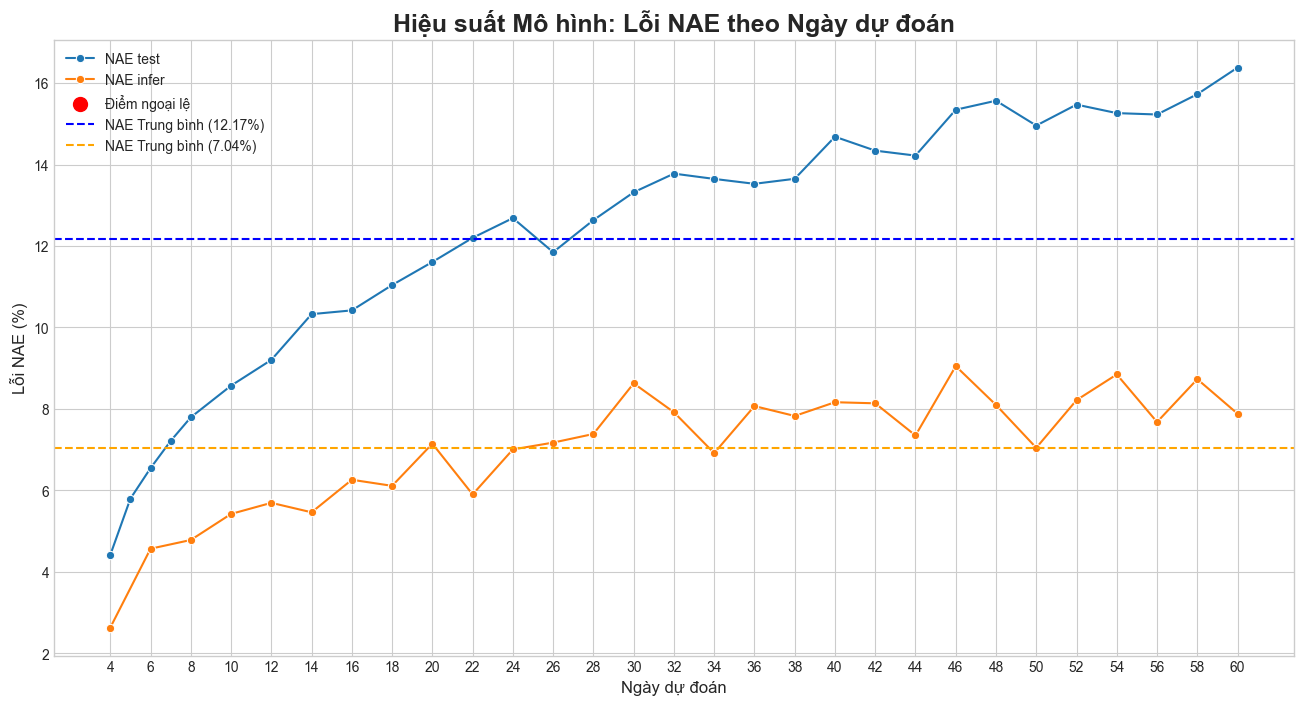

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re # Thư viện cho biểu thức chính quy

# Khởi tạo các danh sách rỗng để lưu dữ liệu
days = []
naes = []
days1 = []
naes1 = []

# Tên file bạn đã tạo
file_path = './ans/NAE_ans_ensemble.txt'

# Mở và đọc file một cách an toàn
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Sử dụng biểu thức chính quy để tìm các con số trong dòng
        # Mẫu này tìm: chữ "ngày", theo sau là một hoặc nhiều chữ số (\d+),
        # sau đó là ":", và một số thập phân ([\d.]+)
        match = re.search(r"ngày (\d+) với ensemble là : ([\d.]+)%", line)
        
        # Nếu tìm thấy mẫu phù hợp trong dòng
        if match:
            # Lấy ra các nhóm đã tìm thấy
            day = int(match.group(1))   # Nhóm 1 là số ngày
            nae = float(match.group(2)) # Nhóm 2 là giá trị NAE
            
            # Thêm các giá trị đã trích xuất vào danh sách
            days.append(day)
            naes.append(nae)

# Tạo DataFrame từ các danh sách
results_df = pd.DataFrame({
    'Day': days,
    'NAE': naes
})
file_path = './ans/ket_qua_danh_gia.txt'

# Mở và đọc file một cách an toàn
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Sử dụng biểu thức chính quy để tìm các con số trong dòng
        # Mẫu này tìm: chữ "ngày", theo sau là một hoặc nhiều chữ số (\d+),
        # sau đó là ":", và một số thập phân ([\d.]+)
        match = re.search(r"NAE cho d(\d+) : ([\d.]+)%", line)
        
        # Nếu tìm thấy mẫu phù hợp trong dòng
        if match:
            # Lấy ra các nhóm đã tìm thấy
            day = int(match.group(1))   # Nhóm 1 là số ngày
            nae = float(match.group(2)) # Nhóm 2 là giá trị NAE
            
            # Thêm các giá trị đã trích xuất vào danh sách
            days1.append(day)
            naes1.append(nae)

# Tạo DataFrame từ các danh sách
results_df1 = pd.DataFrame({
    'Day': days1,
    'NAE': naes1
})


# Giả sử DataFrame 'results_df' đã được tạo từ đoạn code của bạn

# Tính giá trị trung bình của cột 'NAE'
average_nae = results_df['NAE'].mean()
average_nae1 = results_df1['NAE'].mean()

# In kết quả, định dạng để dễ đọc
print(f"NAE trung bình trên test: {average_nae:.2f}%")
print(f"NAE trung bình trên data thật: {average_nae1:.2f}%")

outlier_days = []
outliers_df = results_df[results_df['Day'].isin(outlier_days)]

# 2. Vẽ biểu đồ
plt.style.use('seaborn-v0_8-whitegrid') # Sử dụng style cho đẹp hơn
plt.figure(figsize=(16, 8))

# Vẽ đường xu hướng chính
#sns.lineplot(x='Day', y='NAE', data=results_df, marker='o', label='NAE tuần trước')
sns.lineplot(x='Day', y='NAE', data=results_df, marker='o', label='NAE test')
sns.lineplot(x='Day', y='NAE', data=results_df1, marker='o', label='NAE infer')

# Đánh dấu các điểm ngoại lệ bằng chấm đỏ lớn hơn
plt.scatter(outliers_df['Day'], outliers_df['NAE'], color='red', s=100, zorder=5, label='Điểm ngoại lệ')

# 3. Thêm các đường tham chiếu và chú thích
# Tính NAE trung bình
average_nae = results_df['NAE'].mean()
plt.axhline(y=average_nae, color='blue', linestyle='--', label=f'NAE Trung bình ({average_nae:.2f}%)')
average_nae1 = results_df1['NAE'].mean()
plt.axhline(y=average_nae1, color='orange', linestyle='--', label=f'NAE Trung bình ({average_nae1:.2f}%)')


# Thêm tiêu đề và nhãn
plt.title('Hiệu suất Mô hình: Lỗi NAE theo Ngày dự đoán', fontsize=18, fontweight='bold')
plt.xlabel('Ngày dự đoán', fontsize=12)
plt.ylabel('Lỗi NAE (%)', fontsize=12)
plt.xticks(range(int(results_df['Day'].min()), int(results_df['Day'].max()) + 1, 2))
plt.legend()
plt.grid(True)

# 4. Hiển thị biểu đồ
plt.show()